# <center>House Price Prediction</center>

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
 
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# LOAD DATA

In [3]:
# load data
df = pd.read_excel("data/assignment1.xlsx")

# EXPLORATORY DATA ANALYSIS

In [4]:
# inspect the first five rows
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
# check no. of rows by columns
df.shape

(414, 9)

In [6]:
# check missing values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
# drop null values
df = df.dropna()
df.shape

(414, 9)

In [8]:
# drop duplicate values
df = df.drop_duplicates()
df.shape

(414, 9)

#### NOTES
1. **No missing values**
2. **No duplicate values**

In [9]:
list(df.columns)

['Transaction date',
 'House Age',
 'Distance from nearest Metro station (km)',
 'Number of convenience stores',
 'latitude',
 'longitude',
 'Number of bedrooms',
 'House size (sqft)',
 'House price of unit area']

In [10]:
# inspect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 32.3 KB


In [11]:
# basic statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


#### NOTES
1. **The datatypes are of numerical i.e integer and float.**
2. **The average age of the house is 17.7 years.**
3. **Average number of convenience store is 4.**
4. **On average there are only 2 bedrooms per house.**

Let's focus on the target **House price of unit area** and create a histogram to check if the data is **normally distributed or not** because if we want to create a Linear Model the features must be normally distributed which is one of the assumptions of Linear Regression.

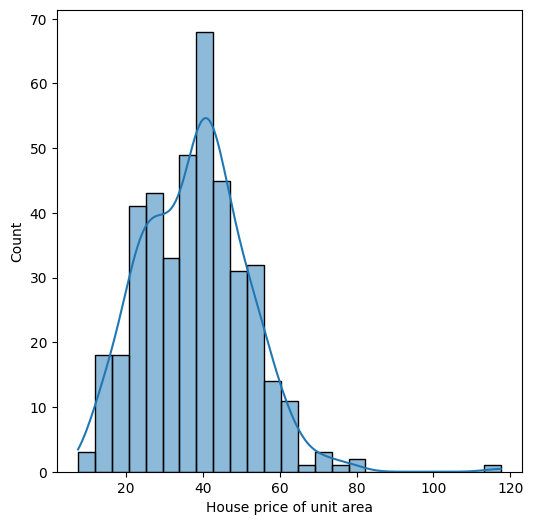

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x = "House price of unit area", kde=True, bins = 25)
plt.show()

#### NOTES
1. **The distribution of target variable is not perfectly Normal.**
2. **The target variable contains outliers.**

## SKEWNESS & KURTOSIS

In [13]:
df["House price of unit area"].skew()

0.5998525842660576

In [14]:
df["House price of unit area"].kurtosis()

2.1790970477396163

#### NOTES
1. **The ideal value of skewness for Normal Distribution is 0. Since the value of skewness here is 0.6 we can say that the target variable is moderately skewed.**
2. **The ideal value of Kurtosis of Normal Distribution is 3. Since the the value 2.18 < 3 the height of bell curve is shorter and thicker tails.**

### TREATING OUTLIERS

In [15]:
df_old = df
df = df[df["House price of unit area"] < 100]

In [16]:
print(f"Skewness after treating outliers :{df['House price of unit area'].skew()}")

Skewness after treating outliers :0.17434852356193845


## CORRELATION

In [17]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.018523,0.061990,0.011232,0.034330,-0.040788,0.061993,0.066560,0.081757
House Age,0.018523,1.000000,0.024676,0.048131,0.055119,-0.048822,-0.008739,-0.058638,-0.210985
Distance from nearest Metro station (km),0.061990,0.024676,1.000000,-0.605328,-0.590805,-0.807079,-0.046858,0.003827,-0.694009
Number of convenience stores,0.011232,0.048131,-0.605328,1.000000,0.445994,0.449239,0.043734,0.036633,0.612635
latitude,0.034330,0.055119,-0.590805,0.445994,1.000000,0.413249,0.043916,0.030384,0.563954
longitude,-0.040788,-0.048822,-0.807079,0.449239,0.413249,1.000000,0.041689,0.009923,0.549250
Number of bedrooms,0.061993,-0.008739,-0.046858,0.043734,0.043916,0.041689,1.000000,0.753697,0.052269
House size (sqft),0.066560,-0.058638,0.003827,0.036633,0.030384,0.009923,0.753697,1.000000,0.029859
House price of unit area,0.081757,-0.210985,-0.694009,0.612635,0.563954,0.549250,0.052269,0.029859,1.000000


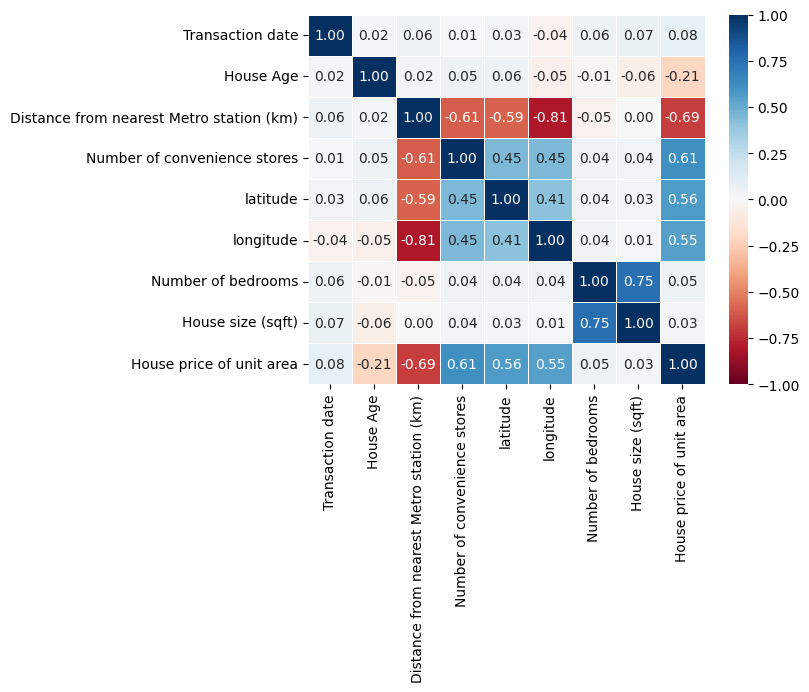

In [18]:
# heatmap
sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True,cmap="RdBu",linewidths=.5,fmt=".2f")
plt.show()

In [19]:
# arranged in descending order
corr_matrix["House price of unit area"].sort_values(ascending=False)[1:]

Number of convenience stores                0.612635
latitude                                    0.563954
longitude                                   0.549250
Transaction date                            0.081757
Number of bedrooms                          0.052269
House size (sqft)                           0.029859
House Age                                  -0.210985
Distance from nearest Metro station (km)   -0.694009
Name: House price of unit area, dtype: float64

#### NOTES
The top features with Positive Correlation are:
1. **Number of convenience stores**
2. **latitude**
3. **longitude**

The top features with Negative Correlation are:
1. **Distance from nearest Metro station (km)**
2. **House Age**

## House price of unit area `v/s` Number of convenience stores  

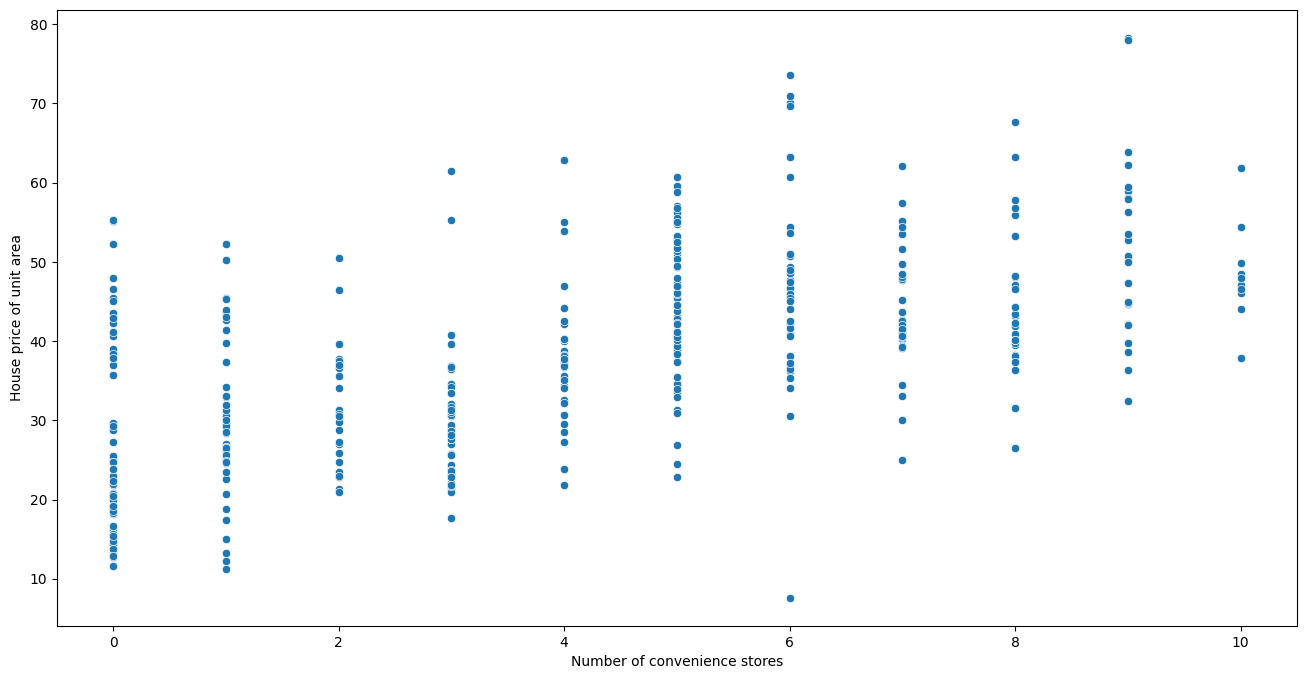

In [20]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, x = "Number of convenience stores", y="House price of unit area",legend=True)
plt.show()

## House price of unit area `v/s` latitude 

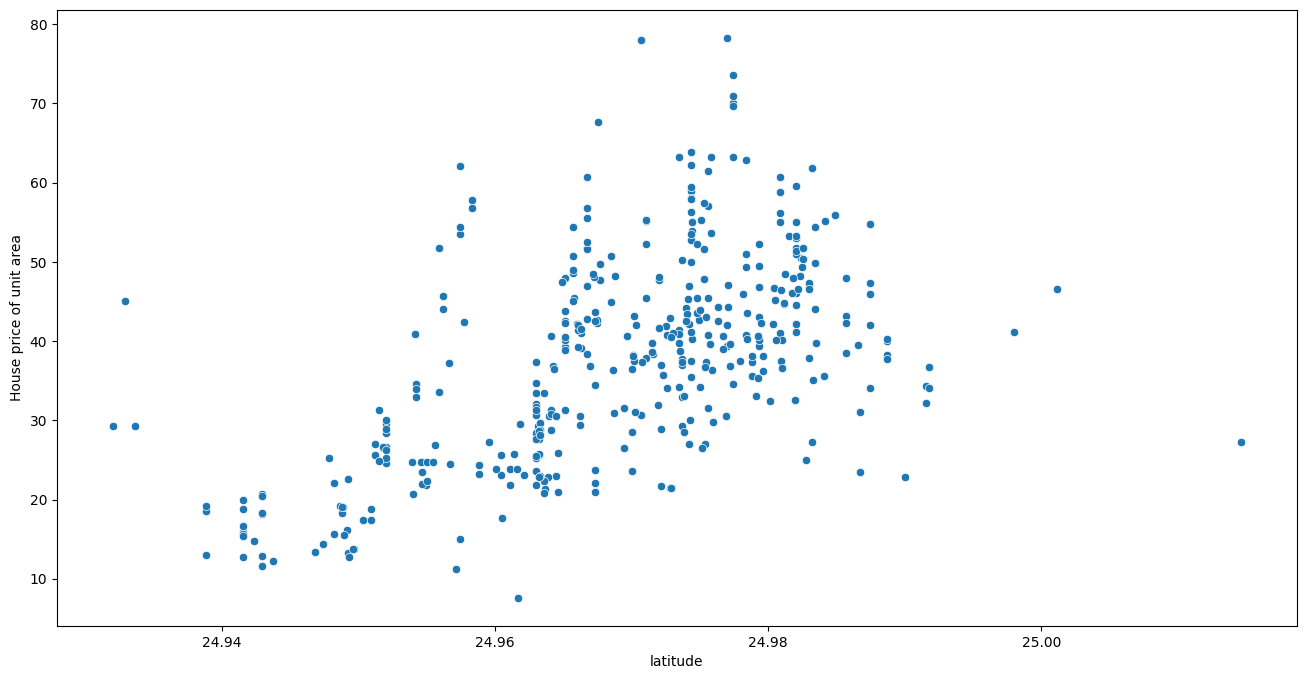

In [21]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, x = "latitude", y="House price of unit area",legend=True)
plt.show()

#### NOTES
1. **The one data point in the bottom right doesn't follow the trend, so getting rid of it.**

In [22]:
# remove outliers
df = df[df['latitude'] < 25.01]
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


## House price of unit area `v/s` longitude

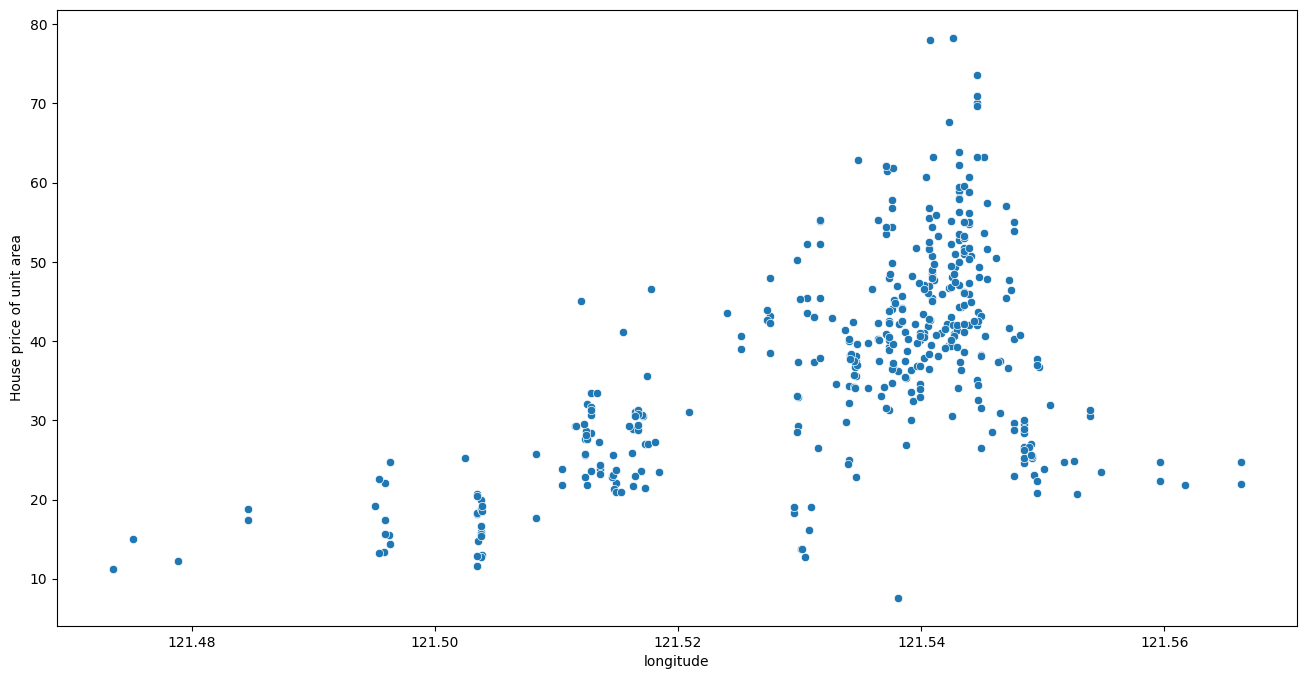

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, x = "longitude", y="House price of unit area",legend=True)
plt.show()

#### NOTES
1. **The four data points in the bottom right doesn't follow the trend, so getting rid of it.**

In [24]:
# remove outliers
df = df[df['longitude'] < 121.56]
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


## House price of unit area `v/s` Distance from nearest Metro station (km)

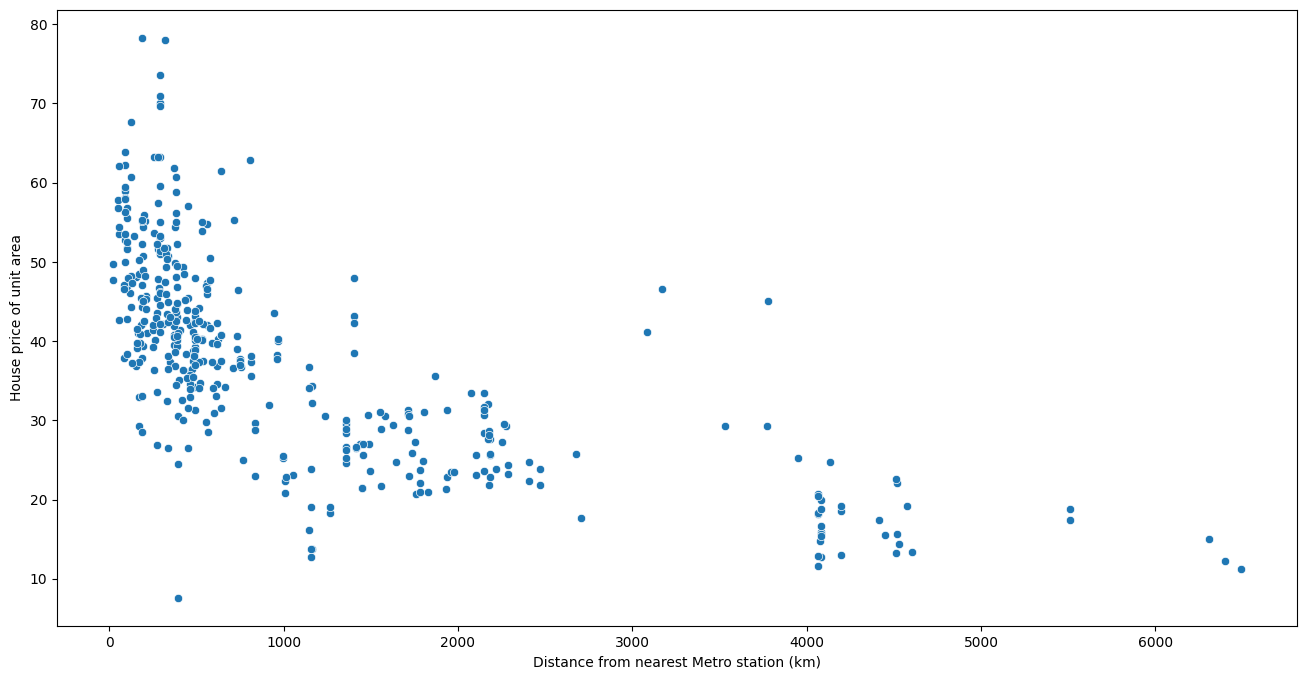

In [25]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, x = "Distance from nearest Metro station (km)", \
                y="House price of unit area",legend=True)
plt.show()

## House price of unit area `v/s` House Age

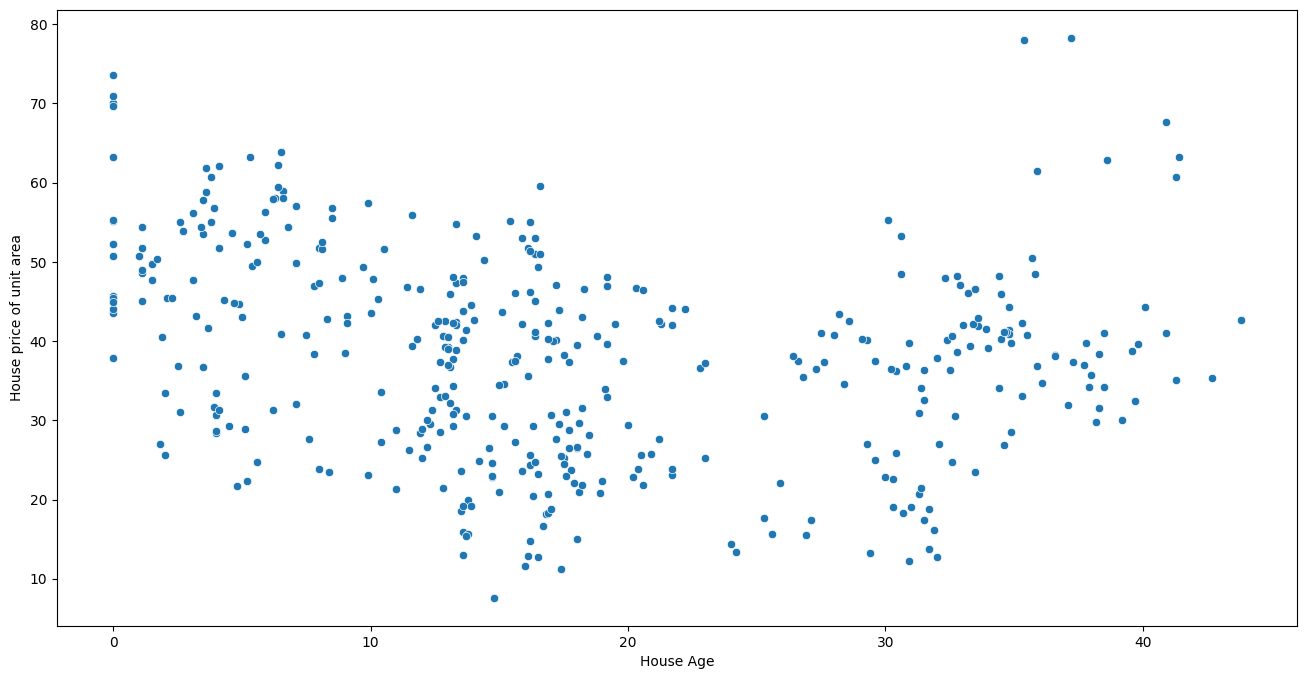

In [26]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df, x = "House Age", y="House price of unit area",legend=True)
plt.show()

In [27]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## STANDARDIZING NUMERICAL DATA

In [28]:
# extract numerical columns
numerical_features = list(df.columns.drop("House price of unit area"))
df[numerical_features]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597


In [29]:
# standard scaler object
scaler = StandardScaler()

# scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.isnull().sum()

/var/folders/kl/b_7s360d6_95c12zywr6p0000000gn/T/ipykernel_6436/4172786415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

## TRAIN TEST SPLIT

In [30]:
# features
X = df[numerical_features]
display(X.head())
# target
y = df["House price of unit area"]
y.isnull().sum()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,-0.828104,1.243938,-0.784972,2.000936,1.144979,0.465896,-1.204763,-1.020179
1,-0.828104,0.149902,-0.607418,1.659374,0.928606,0.417756,0.014910,0.888101
2,1.540389,-0.392740,-0.402898,0.293125,1.512158,0.707913,1.234584,0.371574
3,1.244327,-0.392740,-0.402898,0.293125,1.512158,0.707913,0.014910,-0.159301
4,-1.124165,-1.119180,-0.540170,0.293125,0.849105,0.611634,-1.204763,-1.261225


0

In [31]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((327, 8), (82, 8), (327,), (82,))

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
r2_score(y_test,y_pred)

0.6879217164860343

In [36]:
mse = mean_squared_error(y_test,y_pred)
mse

56.29050681433603

In [37]:
rmse = np.sqrt(mse)
rmse

7.5026999683004805

## RIDGE REGRESSION

In [38]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [39]:
y_pred = ridge.predict(X_test)

In [40]:
r2_score(y_test,y_pred)

0.6878194766972682

In [41]:
mse = mean_squared_error(y_test,y_pred)
mse

56.308948115221924

In [42]:
rmse = np.sqrt(mse)
rmse

7.503928845293106

## LASSO

In [43]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [44]:
y_pred = lasso.predict(X_test)

In [45]:
r2_score(y_test,y_pred)

0.6671881885815791

In [46]:
mse = mean_squared_error(y_test,y_pred)
mse

60.03027614608683

In [47]:
rmse = np.sqrt(mse)
rmse

7.747920762765119

## ELASTICNET

In [48]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

ElasticNet()

In [49]:
y_pred = elastic_net.predict(X_test)

In [50]:
r2_score(y_test,y_pred)

0.63641231021043

In [51]:
mse = mean_squared_error(y_test,y_pred)
mse

65.58141469908654

In [52]:
rmse = np.sqrt(mse)
rmse

8.09823528301608

## SUPPORT VECTOR MACHINE

In [53]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)

SVR(C=100000)

In [54]:
y_pred = svr.predict(X_test)

In [55]:
r2_score(y_test,y_pred)

-1.7161972705354605

In [56]:
mse = mean_squared_error(y_test,y_pred)
mse

489.92874238016327

In [57]:
rmse = np.sqrt(mse)
rmse

22.13433401709126

## RANDOM FOREST REGRESSOR

In [72]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y_pred = random_forest.predict(X_test)

In [74]:
r2_score(y_test,y_pred)

0.7571892077928791

In [75]:
mse = mean_squared_error(y_test,y_pred)
mse

43.79651925609755

In [76]:
rmse = np.sqrt(mse)
rmse

6.61789386860333

## XGBOOST REGRESSOR

In [77]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
y_pred = xgb.predict(X_test)

In [79]:
r2_score(y_test,y_pred)

0.7269591093759056

In [80]:
mse = mean_squared_error(y_test,y_pred)
mse

49.24921382291623

In [81]:
rmse = np.sqrt(mse)
rmse

7.017778410787579

In [68]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
svr = SVR()
random_forest = RandomForestRegressor()
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)

models = [lr, ridge, lasso, elastic_net, svr,random_forest, xgb]
store = {}

def model_training(X_train, X_test, y_train, y_test, models):
    
    for model in models:
        # initialize store
        store[model] = list()
        print(store)
        # model training
        model.fit(X_train, y_train)
        
        # prediction
        y_pred = model.predict(X_test)
        
        # r2 score
        score = r2_score(y_test,y_pred)
        store[model].append(score * 100)
        
        # root mean squared score
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        store[model].append(rmse)
        

In [69]:
model_training(X_train, X_test, y_train, y_test, models)

{LinearRegression(): []}
{LinearRegression(): [68.79217164860343, 7.5026999683004805], Ridge(): []}
{LinearRegression(): [68.79217164860343, 7.5026999683004805], Ridge(): [68.78194766972682, 7.503928845293106], Lasso(): []}
{LinearRegression(): [68.79217164860343, 7.5026999683004805], Ridge(): [68.78194766972682, 7.503928845293106], Lasso(): [66.71881885815792, 7.747920762765119], ElasticNet(): []}
{LinearRegression(): [68.79217164860343, 7.5026999683004805], Ridge(): [68.78194766972682, 7.503928845293106], Lasso(): [66.71881885815792, 7.747920762765119], ElasticNet(): [63.641231021043, 8.09823528301608], SVR(): []}
{LinearRegression(): [68.79217164860343, 7.5026999683004805], Ridge(): [68.78194766972682, 7.503928845293106], Lasso(): [66.71881885815792, 7.747920762765119], ElasticNet(): [63.641231021043, 8.09823528301608], SVR(): [59.71420083053316, 8.524360280760515], RandomForestRegressor(): []}
{LinearRegression(): [68.79217164860343, 7.5026999683004805], Ridge(): [68.78194766972682

In [70]:
model_comparison = pd.DataFrame(store, index=["R2 SCORE","RMSE"])
model_comparison =model_comparison.set_axis(["lr", "ridge", "lasso", "elastic_net", "svr","random_forest", \
                                             "xgb"] ,axis=1)

In [71]:
model_comparison.T.sort_values('R2 SCORE',ascending=False)

,R2 SCORE,RMSE
random_forest,76.874470,6.458500
xgb,72.695911,7.017778
lr,68.792172,7.502700
ridge,68.781948,7.503929
lasso,66.718819,7.747921
elastic_net,63.641231,8.098235
svr,59.714201,8.524360
